# COMPLEX NEURON

Load some libs

In [1]:
# Import Libs
import numpy as np
import matplotlib.pyplot as plt
import h5py
import scipy
from PIL import Image
from scipy import ndimage
from lr_utils import load_dataset
from sklearn.model_selection import train_test_split

%matplotlib inline

Create function to init with zeros weights w  and bias b

In [2]:
def initialize_with_zeros(dim):
    """
    This function creates a vector of zeros of shape (dim, 1) for w and initializes b to 0.
    
    Argument:
    dim -- size of the w vector we want (or number of parameters in this case)
    
    Returns:
    w -- initialized vector of shape (dim, 1)
    b -- initialized scalar (corresponds to the bias)
    """
    
    w = np.random.normal(0.0, pow(1.0, -0.5), (dim))
    w = np.array(w, ndmin=2, dtype='complex128')
    w += 1j * np.random.normal(0.0, pow(1.0, -0.5), (dim))
    w = w.reshape(w.shape[1],1)
    
    b = 0 + 0j
    assert(w.shape == (dim, 1))
    assert(isinstance(b, complex) or isinstance(b, como))
    
    return w, b 

Create Activation function ispired by the book

In [3]:
# Activation Function 
def z_to_class(z):
    """
    """
    categories = 2
    
    # first work out the angle, but shift angle from [-pi/2, +pi.2] to [0,2pi]
    z_angle = np.angle(z)*180/np.pi + 180
    
    print('angle of z is:',z_angle )
    angle = np.mod(np.angle(z) + 2*np.pi, 2*np.pi)
    print('angle is ', (angle*180)/np.pi)
    # from angle to category
    print('categories', (angle*180 / (2*np.pi))/categories)
    p = (np.floor(categories * angle / (2*np.pi))).astype(int)
    #return p
    #p = np.mod(p, categories)
    print('p mod is ', p)
    return p

In [808]:
# Activation Function 
def z_to_class(z):
    """
    """
    categories = 2
    periodicity = 1
    angle = np.mod(np.angle(z) + 2*np.pi, 2*np.pi)
    angle = np.angle(z)
    print(angle*180/np.pi)
    p = np.floor(categories * periodicity * angle / (2*np.pi)).astype(int)
    p = np.mod(p, categories)
    return p

In [4]:
def class_to_angle(Y, categories):
    angle = ((Y + 0.5) / categories) * 2 * np.pi
    return angle

# Example Learn Xor

In [5]:
# Create dataset for learn - XOR
X = np.array([[-1.0, -1.0], [-1.0, 1.0], [1.0, -1.0], [1.0, 1.0]])
X_train = X.reshape(X.shape[0], -1)
Y = np.array([[0,1,1,1]])
print('m training samples, 2 dims each one',X_train.shape)
print('1 column of m Y samples', Y.shape)

m training samples, 2 dims each one (4, 2)
1 column of m Y samples (1, 4)


In [82]:
w,b = initialize_with_zeros(2)

In [92]:
from numpy import linalg as LA

def propagate_XOR(w, b, X, Y):
    """
    Implement the cost function and its gradient for the propagation explained above

    Arguments:
    w -- weights, a numpy array of size (num_params_of_X, 1)
    b -- bias, a scalar
    X -- data of size (num__params_of_X, number of examples)
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat) of size (1, number of examples)

    Return:
    cost -- negative log-likelihood cost for logistic regression
    dw -- gradient of the loss with respect to w, thus same shape as w
    db -- gradient of the loss with respect to b, thus same shape as b
    
    Tips:
    """

    m = X.shape[1]
    categories = len(np.unique(Y))
    inputs = X
    # convert inputs and outputs list to 2d array
    inputs = np.array(X, ndmin=2, dtype='complex128')
    # combine inputs, weighted
    z = np.dot(w.T, inputs) + b
    z_norm = np.dot(z, z.T)
    #z_norm = LA.norm(z)
    print('Z.norm', z_norm)
    angle = class_to_angle(Y, categories)
    
    desired = np.exp(1j*angle)
    actual = z / z_norm
    
    c =  desired - actual
    print('desired, ', desired)
    print('actual', actual)
    print('c is ' , c)
    cost = (1/(m+1))*np.sum(c)
    cost = np.abs(np.squeeze(cost))
    #cost = c
    # potential errors errors
    
    dw =  np.dot(c, np.conj(inputs.T)) / (z_norm*(m+1))
    db = cost
    print('desired', 'angle:', np.angle(desired)*180/np.pi, 'abs', np.abs(desired))
    print('actual', 'angle:', np.angle(actual)*180/np.pi, 'abs', np.abs(actual))

    
    print('////////////////////////////////////')
    print('result:')
    print('angles of c:', np.angle(c)*180/np.pi)
    print('abs of c :', np.abs(c))
    
    print('////////////////////////////////////')
    plt.polar([0, np.angle(c[0][0])], [0, abs(c[0][0])], marker='o')
    plt.polar([0, np.angle(c[0][3])], [0, abs(c[0][3])], marker='o')
    plt.polar([0, np.angle(c[0][2])], [0, abs(c[0][2])], marker='o')
    plt.polar([0, np.angle(c[0][1])], [0, abs(c[0][1])], marker='o')
   
    grads = {"dw": dw.T,
             "db": db}
    return grads, cost

Z.norm [[ 59.93460678+2.42572965j]]
desired,  [[  6.12323400e-17+1.j  -1.83697020e-16-1.j  -1.83697020e-16-1.j
   -1.83697020e-16-1.j]]
actual [[ 0.04537076-0.00985611j  0.06863384+0.00245182j  0.05837168-0.00759211j
   0.08163476+0.00471582j]]
c is  [[-0.04537076+1.00985611j -0.06863384-1.00245182j -0.05837168-0.99240789j
  -0.08163476-1.00471582j]]
desired angle: [[ 90. -90. -90. -90.]] abs [[ 1.  1.  1.  1.]]
actual angle: [[-12.25621382   2.04591897  -7.41056951   3.30615106]] abs [[ 0.04642897  0.06867762  0.05886335  0.08177086]]
////////////////////////////////////
result:
angles of c: [[ 92.57245189 -93.91669921 -93.3661585  -94.64516924]]
abs of c : [[ 1.0108748   1.00479862  0.99412307  1.00802685]]
////////////////////////////////////


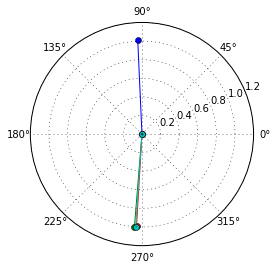

In [93]:
grads, cost  = propagate_XOR(w,b, X_train.T, Y)

In [111]:
a = 6.12323400e-17+1.j
b = 0.04537076-0.00985611j
c = a - b
print(c)
print(np.angle(b))
print('a:',np.abs(a), np.angle(a)*180/np.pi)
print('b:',np.abs(b), np.angle(b)*180/np.pi)
print('c: ',np.abs(c), np.angle(c)*180/np.pi)


(-0.04537075999999994+1.00985611j)
-0.213911279465
a: 1.0 90.0
b: 0.0464289647452 -12.2562135036
c:  1.01087480371 92.5724517259


In [126]:
def angle(a,b):
    the_cos_theta = np.dot(a, np.conj(b))/ (np.abs(a)* np.abs(b))
    theta = np.arccos(the_cos_theta)
    return theta

theta = angle(a,b)
print(theta*180/np.pi)
print(np.abs(theta*180/np.pi))

(98.6831375513-50.0332940664j)
110.642180709


In [118]:
d = (1.0*np.exp(1j*np.pi/2)) - (0.064*np.exp(-1j*0.213911279465))
print(d)

(-0.0625413178161+1.01358615346j)


In [101]:
correction_angle = a - c
print(np.angle(correction_angle)*180/np.pi)

-12.2562135036


Check if the complex plane is divided in two regions, 0 and 1

In [88]:
def propagate(w, b, X, Y):
    
    """
        n_l = Number of nodes in layer l
        m = number of training examples
        
        inputs  = (n_l-1, m)
        w = (n_l, n_l-1)
        z = (n_l)
        
    """
    
    m = X.shape[1]
    categories = Y.shape[1]
    inputs = X
    # convert inputs and outputs list to 2d array
    inputs = np.array(X, ndmin=2, dtype='complex128')
    # combine inputs, weighted
    z = np.dot(w.T, inputs) + b
    z_norm = np.dot(z, z.T)
    
    angle = class_to_angle(Y, categories)
    #cost = (1/m)*np.sum((np.exp(1j*class_to_angle)/np.abs(z)) - z/np.sqrt(np.abs(z)))
    desired_output = np.exp(1j*angle) - z / z_norm
    
    
    cost = (1/(m+1))*np.sum(desired_output)
    # potential errors errors
    #errors = (np.exp(1j*class_to_angle))/np.abs(z) - z/np.sqrt(np.abs(z))
    #e = np.abs(np.sum(errors))/
    # dw = e * x.T / (x.x.T)
    dw = np.dot(inputs, desired_output.T) / (z_norm*(m+1))
    db = cost
    cost = np.abs(np.squeeze(cost))
    grads = {"dw": dw,
             "db": db}
    return grads, cost

In [89]:
def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost = False):
    costs = []
    
    for i in range(num_iterations):
        # Cost and gradient calculation (≈ 1-4 lines of code)
        ### START CODE HERE ### 
        grads, cost = propagate_XOR(w, b, X, Y)
        
        
        #c = np.dot(w.T, X) + b
        
        #plt.polar([0, np.angle(desired[0][0])], [0, abs(desired[0][0])], marker='o')
        #plt.polar([0, np.angle(c[0][0])], [0, abs(c[0][0])], marker='o')
        #plt.polar([0, np.angle(actual[0][0])], [0,magnitud], marker='o')
        #plt.polar([0, np.angle(c[0][2])], [0, abs(c[0][2])], marker='o')
        #plt.polar([0, np.angle(c[0][3])], [0, abs(c[0][3])], marker='o')
    
        ### END CODE HERE ###
        
        # Retrieve derivatives from grads
        dw = grads["dw"]
        db = grads["db"]
            # update rule (≈ 2 lines of code)
        ### START CODE HERE ###
        w = w + learning_rate*dw
        b = b + learning_rate*db
        ### END CODE HERE ###

        # Record the costs
        if i % 10 == 0:
            costs.append(cost)
        
        # Print the cost every 100 training examples
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
    
    params = {"w": w,
              "b": b}
    
    grads = {"dw": dw,
             "db": db}
    
    return params, grads, costs

LEARN XOR

Z.norm [[ 3.10335134+5.84189773j]]
desired angle: [[ 90. -90. -90. -90.]] abs [[ 1.  1.  1.  1.]]
actual angle: [[ 148.3280079   -19.40564698  160.59435302  -31.6719921 ]] abs [[ 0.26785048  0.06481295  0.06481295  0.26785048]]
////////////////////////////////////
result:
angles of c: [[  75.14359579  -93.57498222  -86.5753754  -104.85640421]]
abs of c : [[ 0.88908439  0.98037339  1.02336184  0.88908439]]
////////////////////////////////////
Z.norm [[ 3.20046457+5.33622218j]]
desired angle: [[ 90. -90. -90. -90.]] abs [[ 1.  1.  1.  1.]]
actual angle: [[ 161.32474939  -36.39911361 -133.011848    -33.52810638]] abs [[ 0.21606911  0.12439355  0.04983721  0.32487552]]
////////////////////////////////////
result:
angles of c: [[  77.59764595  -96.16997529  -87.97931861 -108.26525198]]
abs of c : [[ 0.95305486  0.93158032  0.96415795  0.86409301]]
////////////////////////////////////
Z.norm [[ 4.33247109+4.78673457j]]
desired angle: [[ 90. -90. -90. -90.]] abs [[ 1.  1.  1.  1.]]
actual ang

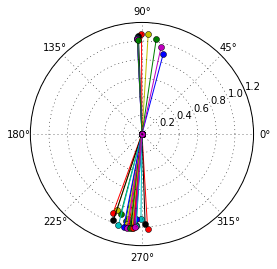

In [90]:
w,b = initialize_with_zeros(2)
X = X_train.T

params, grads, costs = optimize(w, b, X, Y, num_iterations= 10, learning_rate = 1, print_cost = False)

Z.norm [[ 59.93460678+2.42572965j]]
desired angle: [[ 90. -90. -90. -90.]] abs [[ 1.  1.  1.  1.]]
actual angle: [[-12.25621382   2.04591897  -7.41056951   3.30615106]] abs [[ 0.04642897  0.06867762  0.05886335  0.08177086]]
////////////////////////////////////
result:
angles of c: [[ 92.57245189 -93.91669921 -93.3661585  -94.64516924]]
abs of c : [[ 1.0108748   1.00479862  0.99412307  1.00802685]]
////////////////////////////////////
Z.norm [[ 72.835421+2.36673897j]]
desired angle: [[ 90. -90. -90. -90.]] abs [[ 1.  1.  1.  1.]]
actual angle: [[-10.31134773   2.11475073  -6.43389734   3.19444395]] abs [[ 0.04363244  0.06201914  0.05393781  0.0727603 ]]
////////////////////////////////////
result:
angles of c: [[ 92.43904418 -93.53840158 -93.08662936 -94.13836074]]
abs of c : [[ 1.00872392  1.00420292  0.99539996  1.00667927]]
////////////////////////////////////
Z.norm [[ 87.01971691+2.31853493j]]
desired angle: [[ 90. -90. -90. -90.]] abs [[ 1.  1.  1.  1.]]
actual angle: [[-8.855764

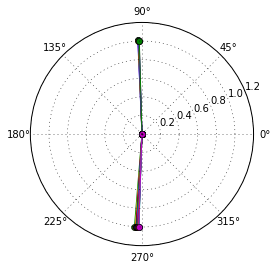

In [91]:
w, b = params['w'], params['b']
params, grads, costs = optimize(w, b, X, Y, num_iterations= 10, learning_rate = 1, print_cost = False)

In [65]:
print(w)
print('w', params['w'])
print('b',params['b'])


[[-0.27654238-0.00959931j]
 [-0.09498832-0.26355699j]]
w [[-0.27646123-0.04002632j]
 [-0.09500410-0.29384701j]]
b (8.27494829257631+0j)


In [66]:
def predict(w, b, X):
    '''
    Predict whether the label is 0 or 1 using learned logistic regression parameters (w, b)
    
    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of size (num_px * num_px * 3, number of examples)
    
    Returns:
    Y_prediction -- a numpy array (vector) containing all predictions (0/1) for the examples in X
    '''
    
    m = X.shape[1]
    Y_prediction = np.zeros((1,m))
    
    # convert inputs and outputs list to 2d array
    inputs = np.array(X, ndmin=2, dtype='complex128')
    
    # Compute vector "A" predicting the probabilities of a cat being present in the picture
    ### START CODE HERE ### (≈ 1 line of code)
    z = np.dot(w.T, inputs) + b
    print(' w is ', w)
    print('b is', b)
    print('Z is ', z)
    plt.polar([0, np.angle(z[0][0])], [0, abs(z[0][0])], marker='o')
    
    A = z_to_class(z)
    
    ### END CODE HERE ###
    for i in range(A.shape[1]):
        # Convert probabilities A[0,i] to actual predictions p[0,i]
        ### START CODE HERE ### (≈ 4 lines of code)
        if A[0,i] == 0:
            Y_prediction[0,i] = 0
        elif A[0,i] == 1:
            Y_prediction[0,i] = 1
        else:
            pass
        #Y_prediction[0,i] = A[0,i]
            
        ### END CODE HERE ###
    
    assert(Y_prediction.shape == (1, m))
    
    return Y_prediction

 w is  [[-0.27646123-0.04002632j]
 [-0.09500410-0.29384701j]]
b is (8.27494829257631+0j)
Z is  [[ 8.64641362+0.33387333j]]
angle of z is: [[ 182.21132532]]
angle is  [[ 2.21132532]]
categories [[ 0.55283133]]
p mod is  [[0]]


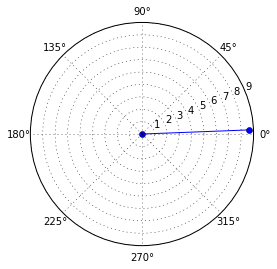

In [67]:
X_test = np.array([[-1.0, -1.0]])
X_test = np.reshape(X_test,(2,1))

Y_prediction =  predict(params['w'], params['b'], X_test )

 w is  [[-0.27646123-0.04002632j]
 [-0.09500410-0.29384701j]]
b is (8.27494829257631+0j)
Z is  [[ 8.64641362+0.33387333j]]
angle of z is: [[ 182.21132532]]
angle is  [[ 2.21132532]]
categories [[ 0.55283133]]
p mod is  [[0]]
[[ 0.]]
 w is  [[-0.27646123-0.04002632j]
 [-0.09500410-0.29384701j]]
b is (8.27494829257631+0j)
Z is  [[ 8.45640542-0.25382069j]]
angle of z is: [[ 178.28077196]]
angle is  [[ 358.28077196]]
categories [[ 89.57019299]]
p mod is  [[1]]
[[ 1.]]
 w is  [[-0.27646123-0.04002632j]
 [-0.09500410-0.29384701j]]
b is (8.27494829257631+0j)
Z is  [[ 8.09349116+0.25382069j]]
angle of z is: [[ 181.79626926]]
angle is  [[ 1.79626926]]
categories [[ 0.44906731]]
p mod is  [[0]]
[[ 0.]]
 w is  [[-0.27646123-0.04002632j]
 [-0.09500410-0.29384701j]]
b is (8.27494829257631+0j)
Z is  [[ 7.90348297-0.33387333j]]
angle of z is: [[ 177.58104551]]
angle is  [[ 357.58104551]]
categories [[ 89.39526138]]
p mod is  [[1]]
[[ 1.]]


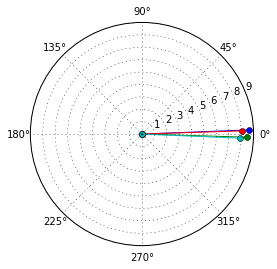

In [68]:
data =  [[-1.0, -1.0],[-1.0, 1.0],[1.0, -1.0], [1.0, 1.0]]
for d in data:
    x = np.array(d)
    
    x = np.reshape(x,(2,1))
    print(predict(params['w'], params['b'], x))

# PREPARING THE pets DATASET


In [7]:
train_set_x_orig, train_set_y, test_set_x_orig = load_dataset()

In [8]:
classes = np.array(['dog', 'cat'], dtype='|S7')
classes

array([b'dog', b'cat'],
      dtype='|S7')

In [9]:
print(train_set_x_orig.shape)
print(train_set_y.shape)

(25000, 64, 64, 3)
(1, 25000)


In [10]:
def imagen_recover(img):
    imagen = (img - np.min(img)) / (np.max(img) - np.min(img))
    return imagen

y = [0], it's a 'dog' picture.


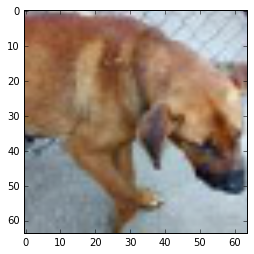

In [11]:
# Example of a picture
index = 25
imagen = (imagen_recover(train_set_x_orig[index]) - np.min(imagen_recover(train_set_x_orig[index]))) / (np.max(imagen_recover(train_set_x_orig[index])) - np.min(imagen_recover(train_set_x_orig[index])))
plt.imshow(imagen)

print ("y = " + str(train_set_y[:, index]) + ", it's a '" + classes[np.squeeze(train_set_y[:, index])].decode("utf-8") +  "' picture.")

In [12]:
train_set_x_mod = train_set_x_orig[:300,:,:,:]
train_set_y_mod = train_set_y[:,:300]
print(train_set_x_mod.shape)
print(train_set_y_mod.shape)

(300, 64, 64, 3)
(1, 300)


In [13]:
train_set_x_mod_flatten =  train_set_x_mod.reshape(train_set_x_mod.shape[0], -1)
print(train_set_x_mod_flatten.shape)

X_train, X_test, y_train, y_test = train_test_split(train_set_x_mod_flatten, \
                                                    train_set_y_mod.T, test_size=0.2, random_state=42)

(300, 12288)


In [14]:
X_train = X_train.T
X_test = X_test.T
Y_train = y_train.T
Y_test = y_test.T
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(12288, 240)
(1, 240)
(12288, 60)
(1, 60)


In [15]:
print(np.max(X_train[0]))
print(np.min(X_train[0]))

0.011868
-0.0109023


In [16]:
# GRADED FUNCTION: model

def model(X_train, Y_train, X_test, Y_test, num_iterations = 2000, learning_rate = 0.5, print_cost = False):
    """
    Builds the logistic regression model by calling the function you've implemented previously
    
    Arguments:
    X_train -- training set represented by a numpy array of shape (num_px * num_px * 3, m_train)
    Y_train -- training labels represented by a numpy array (vector) of shape (1, m_train)
    X_test -- test set represented by a numpy array of shape (num_px * num_px * 3, m_test)
    Y_test -- test labels represented by a numpy array (vector) of shape (1, m_test)
    num_iterations -- hyperparameter representing the number of iterations to optimize the parameters
    learning_rate -- hyperparameter representing the learning rate used in the update rule of optimize()
    print_cost -- Set to true to print the cost every 100 iterations
    
    Returns:
    d -- dictionary containing information about the model.
    """
    
    ### START CODE HERE ###
    
    # initialize parameters with zeros (≈ 1 line of code)
    #w, b = np.zeros((X_train.shape[0],1)), 0.0
    w, b = initialize_with_zeros(X_train.shape[0])
    # Gradient descent (≈ 1 line of code)
    parameters, grads, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost = False)
    
    # Retrieve parameters w and b from dictionary "parameters"
    w = parameters["w"]
    b = parameters["b"]
    
    # Predict test/train set examples (≈ 2 lines of code)
    Y_prediction_test =  predict(w, b, X_test)
    Y_prediction_train = predict(w, b, X_train)

    ### END CODE HERE ###

    # Print train/test Errors
    
    scorecard_test = []
    scorecard_train = []
    
    for i in range(Y_prediction_train.shape[1]):
        # Convert probabilities A[0,i] to actual predictions p[0,i]
        ### START CODE HERE ### (≈ 4 lines of code)
        if Y_prediction_train[0,i] == Y_train[0,i]:
            scorecard_train.append(1)
        else:
            scorecard_train.append(0)
            
    for j in range(Y_prediction_test.shape[1]):
        if Y_prediction_test[0,j] == Y_test[0,j]:
            scorecard_test.append(1)
        else:
            scorecard_test.append(0)
            
    # calculate the performance score, the fraction of correct answers
    scorecard_array_train = np.asarray(scorecard_train)
    scorecard_array_test = np.asarray(scorecard_test)
    print ("performance Train = ", scorecard_array_train.sum() *100/ scorecard_array_train.size)
    print ("performance  Test = ", scorecard_array_test.sum() *100/ scorecard_array_test.size)
    
    #print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
    #print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))

    
    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    return d

In [17]:
d = model(X_train, Y_train, X_test, Y_test, num_iterations = 1000, learning_rate = 0.001, print_cost = True)

p mod is  [[0 0 1 0 1 1 0 1 1 1 1 1 1 1 1 1 0 0 1 0 1 0 1 0 0 0 1 1 1 0 1 0 1 0 0 1 1
  0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0]]
p mod is  [[1 1 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 1 1 0 0
  0 1 1 1 0 1 0 0 1 0 1 0 1 0 0 0 0 1 0 1 0 0 1 1 0 0 1 1 0 1 1 0 0 1 0 1 0
  0 1 0 1 0 1 0 1 1 1 0 1 1 1 1 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 1 1 1 1 0 0 1
  0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 1 0 1 0 1 0 0 0 1 1 1 1 1 0 0 0 1 1 1 0 1 1
  0 0 0 0 1 0 0 1 1 0 1 1 1 0 1 0 0 1 0 1 0 1 1 1 1 1 1 1 0 0 1 0 0 0 1 1 1
  1 0 0 1 0 0 1 1 1 1 0 1 0 1 0 1 0 0 0 0 1 0 0 0 1 0 0 1 0 1 1 1 0 0 1 1 1
  0 0 0 0 0 0 1 0 1 0 0 1 0 1 1 1 1 1]]
performance Train =  45.0
performance  Test =  55.0


1
y = 0, you predicted that it is a "cat" picture.


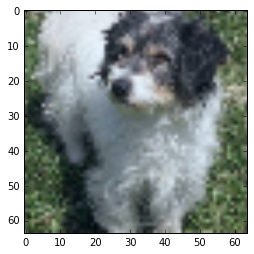

In [18]:
# Example of a picture that was wrongly classified.
index = 9
num_px = 64
num_py = 64
img = X_test[:,index].reshape((num_px, num_px, 3))
img_to_show = imagen_recover(img)
plt.imshow(img_to_show)
print(int(d["Y_prediction_test"][0,index]))
cls = {1:'cat', 0 : 'dog'}

print ("y = " + str(Y_test[0,index]) + ", you predicted that it is a \"" + cls[int(d["Y_prediction_test"][0,index])] +  "\" picture.")

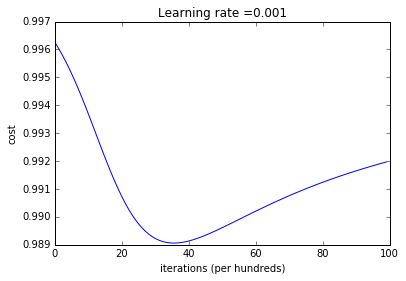

In [19]:
# Plot learning curve (with costs)
costs = np.squeeze(d['costs'])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(d["learning_rate"]))
plt.show()

In [20]:
abs(costs[-1])

0.99196813040624587

learning rate is: 0.01
p mod is  [[1 1 1 0 1 0 1 0 1 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1
  0 1 1 0 0 0 0 1 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0]]
p mod is  [[1 0 1 1 0 0 1 1 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1
  0 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 1 1 0 0 0 0 0 0 1 0 0
  1 1 0 0 0 0 0 0 1 1 1 0 0 1 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1
  0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 1 0 0 0 0 1 0 0 0 1 0 0 0 0
  0 1 0 1 1 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0
  1 1 0 0 0 0 1 0 1 1 0 0 0 1 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 1 1
  0 0 0 1 1 0 1 0 1 0 1 1 0 0 1 1 0 0]]
performance Train =  47.9166666667
performance  Test =  38.3333333333

-------------------------------------------------------

learning rate is: 0.001
p mod is  [[0 0 0 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 0 1 0 0 0 1 1 1 0 0 0 1 0 0 1 1 1 1
  1 0 0 0 1 1 1 0 1 1 1 1 1 0 0 0 0 0 1 1 1 1 0]]
p mod is  [[0 1 1 0 1 1 0 0 0 0 1 1 1 0 0 0 1 1

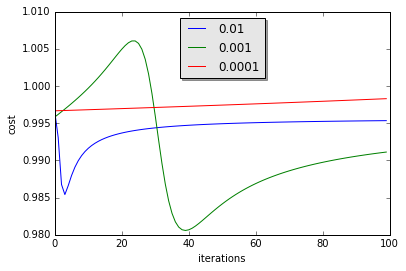

In [21]:
learning_rates = [0.01, 0.001, 0.0001]
models = {}
for i in learning_rates:
    print ("learning rate is: " + str(i))
    models[str(i)] = model(X_train, Y_train, X_test, Y_test, num_iterations = 1000, learning_rate = i, print_cost = False)
    print ('\n' + "-------------------------------------------------------" + '\n')

for i in learning_rates:
    plt.plot(np.squeeze(models[str(i)]["costs"]), label= str(models[str(i)]["learning_rate"]))

plt.ylabel('cost')
plt.xlabel('iterations')

legend = plt.legend(loc='upper center', shadow=True)
frame = legend.get_frame()
frame.set_facecolor('0.90')
plt.show()

In [226]:
import sklearn.model_selection
import pandas as pd
# load the iris training data CSV file into a list
df = pd.read_csv('./datasets/iris_dataset/iris.csv')

# scale the lengths
df[['PW', 'PL', 'SW', 'SL']] = df[['PW', 'PL', 'SW', 'SL']].astype(np.float64) * 0.01

# shuffle and split dataframe into train and test sets, split 3/4 and 1/4
iris_train, iris_test = sklearn.cross_validation.train_test_split(df, train_size=0.75)

In [227]:
iris_test.head()

,Type,PW,PL,SW,SL
16,2,0.10,0.33,0.23,0.50
6,2,0.13,0.45,0.28,0.57
50,1,0.22,0.56,0.28,0.64
66,1,0.18,0.60,0.32,0.72
77,1,0.18,0.48,0.30,0.60


In [1]:
import matplotlib.pyplot as plt
import numpy as np

from scipy.integrate import odeint

# Set random seed (for reproducibility)
np.random.seed(1000)

# Start and end time (in milliseconds)
tmin = 0.0
tmax = 50.0

# Average potassium channel conductance per unit area (mS/cm^2)
gK = 36.0

# Average sodoum channel conductance per unit area (mS/cm^2)
gNa = 120.0

# Average leak channel conductance per unit area (mS/cm^2)
gL = 0.3

# Membrane capacitance per unit area (uF/cm^2)
Cm = 1.0

# Potassium potential (mV)
VK = -12.0

# Sodium potential (mV)
VNa = 115.0

# Leak potential (mV)
Vl = 10.613

# Time values
T = np.linspace(tmin, tmax, 10000)

# Potassium ion-channel rate functions

def alpha_n(Vm):
    return (0.01 * (10.0 - Vm)) / (np.exp(1.0 - (0.1 * Vm)) - 1.0)

def beta_n(Vm):
    return 0.125 * np.exp(-Vm / 80.0)

# Sodium ion-channel rate functions

def alpha_m(Vm):
    return (0.1 * (25.0 - Vm)) / (np.exp(2.5 - (0.1 * Vm)) - 1.0)

def beta_m(Vm):
    return 4.0 * np.exp(-Vm / 18.0)

def alpha_h(Vm):
    return 0.07 * np.exp(-Vm / 20.0)

def beta_h(Vm):
    return 1.0 / (np.exp(3.0 - (0.1 * Vm)) + 1.0)
  
# n, m, and h steady-state values

def n_inf(Vm=0.0):
    return alpha_n(Vm) / (alpha_n(Vm) + beta_n(Vm))

def m_inf(Vm=0.0):
    return alpha_m(Vm) / (alpha_m(Vm) + beta_m(Vm))

def h_inf(Vm=0.0):
    return alpha_h(Vm) / (alpha_h(Vm) + beta_h(Vm))
  
# Input stimulus
def Id(t):
    if 0.0 < t < 1.0:
        return 150.0
    elif 10.0 < t < 11.0:
        return 50.0
    return 0.0
  
# Compute derivatives
def compute_derivatives(y, t0):
    dy = np.zeros((4,))
    
    Vm = y[0]
    n = y[1]
    m = y[2]
    h = y[3]
    
    # dVm/dt
    GK = (gK / Cm) * np.power(n, 4.0)
    GNa = (gNa / Cm) * np.power(m, 3.0) * h
    GL = gL / Cm
    
    dy[0] = (Id(t0) / Cm) - (GK * (Vm - VK)) - (GNa * (Vm - VNa)) - (GL * (Vm - Vl))
    
    # dn/dt
    dy[1] = (alpha_n(Vm) * (1.0 - n)) - (beta_n(Vm) * n)
    
    # dm/dt
    dy[2] = (alpha_m(Vm) * (1.0 - m)) - (beta_m(Vm) * m)
    
    # dh/dt
    dy[3] = (alpha_h(Vm) * (1.0 - h)) - (beta_h(Vm) * h)
    
    return dy
  
# State (Vm, n, m, h)
Y = np.array([0.0, n_inf(), m_inf(), h_inf()])

# Solve ODE system
# Vy = (Vm[t0:tmax], n[t0:tmax], m[t0:tmax], h[t0:tmax])
Vy = odeint(compute_derivatives, Y, T)

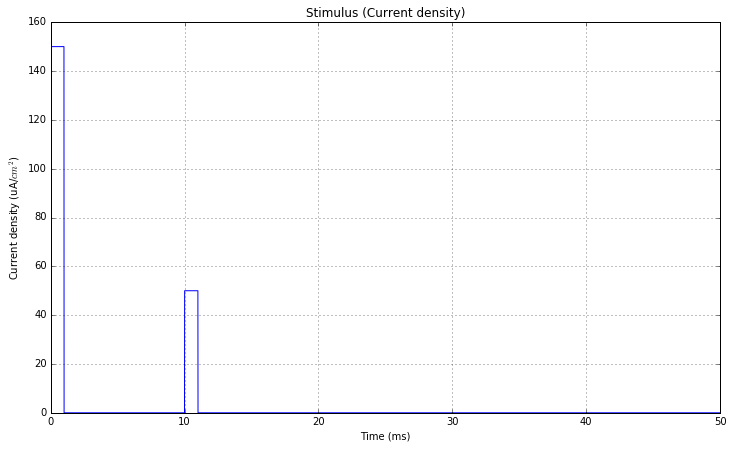

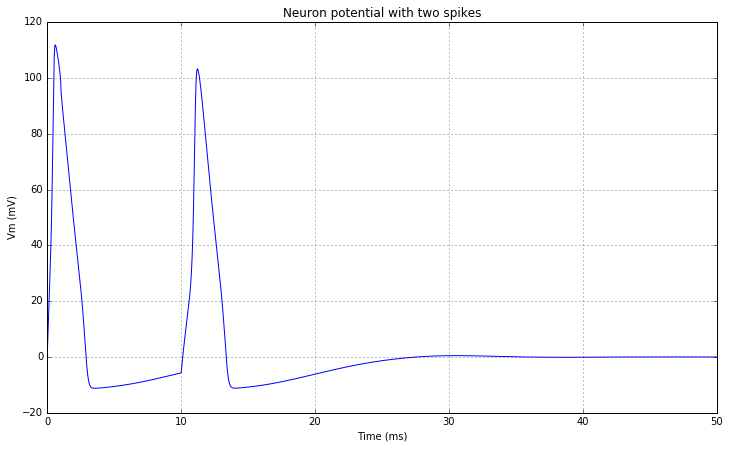

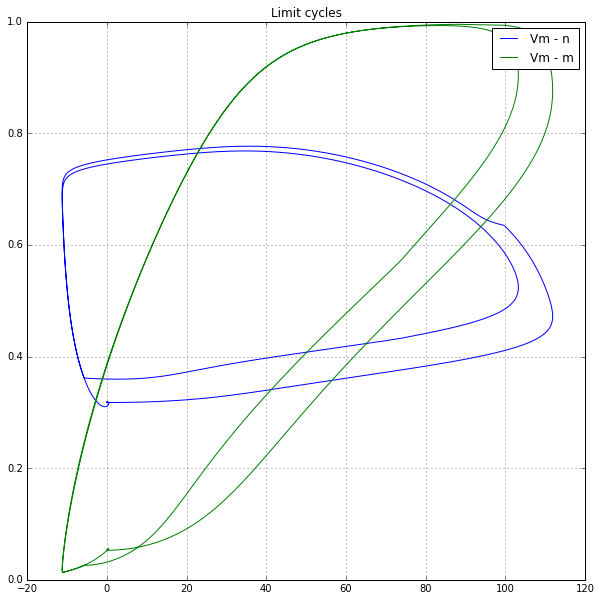

In [4]:
# Input stimulus
Idv = [Id(t) for t in T]

fig, ax = plt.subplots(figsize=(12, 7))
ax.plot(T, Idv)
ax.set_xlabel('Time (ms)')
ax.set_ylabel(r'Current density (uA/$cm^2$)')
ax.set_title('Stimulus (Current density)')
plt.grid()

# Neuron potential
fig, ax = plt.subplots(figsize=(12, 7))
ax.plot(T, Vy[:, 0])
ax.set_xlabel('Time (ms)')
ax.set_ylabel('Vm (mV)')
ax.set_title('Neuron potential with two spikes')
plt.grid()

# Trajectories with limit cycles
fig, ax = plt.subplots(figsize=(10, 10))
ax.plot(Vy[:, 0], Vy[:, 1], label='Vm - n')
ax.plot(Vy[:, 0], Vy[:, 2], label='Vm - m')
ax.set_title('Limit cycles')
ax.legend()
plt.grid()